# Modul 5 Persamaan Diferensial Numerik: Metode Multistep

Kembali ke [Persamaan Diferensial Numerik](./pdnum2024genap.qmd)

## Sistem Persamaan Diferensial

### Bentuk umum

Bentuk umum sistem Persamaan Diferensial:

$u'_1 = f_1(t,u_1,u_2,...,u_m)$

$u'_2 = f_2(t,u_1,u_2,...,u_m)$

$...$

$u'_m = f_m(t,u_1,u_2,...,u_m)$

dengan:

$a \leq t \leq b$

$u_1(a)=a_1, u_2(a)=a_2, ..., u_m(a)=a_m$ (initial value)

Bentuk umum algoritma metode untuk sistem PDB orde 1

```
for i = 1 : N do
    for R in (rumus-rumus untuk iterasi ke-i) do
        for j = 1 : m do
            Hitung R dengan f_j
        endfor
    endfor
endfor
```

Misalnya, apabila ada lima rumus (seperti dalam metode Runge-Kutta orde 4), algoritma untuk sistem menjadi:

```
for i = 1 : N do
    for j = 1 : m do
        Hitung Rumus1 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus2 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus3 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus4 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus5 dengan f_j
    endfor
endfor
```

Apabila misalnya rumus pada iterasi 1, 2, 3 berbeda dengan rumus pada iterasi 4+ (seperti untuk metode Adams predictor-corrector orde 4), algoritma untuk sistem bisa seperti berikut:

```
for i = 1 : 3 do
    for j = 1 : m do
        Hitung Rumus1 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus2 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus3 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus4 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus5 dengan f_j
    endfor 
endfor

for i = 4 : N do
    for j = 1 : m do
        Hitung Rumus1 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus2 dengan f_j
    endfor
endfor
```

### Function file: (fourth-order) Runge-Kutta for systems

Pada modul ini, akan dibahas mengenai metode Runge-Kutta untuk menyelesaikan sistem persamaan diferensial. Berikut merupakan code dari metode Runge-Kutta untuk sistem persamaan diferensial pada Octave yang perlu disimpan pada function file.

Untuk dua PDB:

In [ ]:
function [t, w1, w2] = rko4_sys2(f1, f2, a, b, n, alph1, alph2)
  h = (b - a)/n;
  t = w1 = w2 = [];
  t(1) = a;
  w1(1) = alph1;
  w2(1) = alph2;
  for i = 1:n
    k11 = h * f1(t(i), w1(i), w2(i));
    k12 = h * f2(t(i), w1(i), w2(i));

    k21 = h * f1((t(i)+(h/2)), (w1(i)+(k11/2)), (w2(i)+(k12/2)));
    k22 = h * f2((t(i)+(h/2)), (w1(i)+(k11/2)), (w2(i)+(k12/2)));

    k31 = h * f1((t(i)+(h/2)), (w1(i)+(k21/2)), (w2(i)+(k22/2)));
    k32 = h * f2((t(i)+(h/2)), (w1(i)+(k21/2)), (w2(i)+(k22/2)));

    k41 = h * f1((t(i)+h), (w1(i)+k31), (w2(i)+k32));
    k42 = h * f2((t(i)+h), (w1(i)+k31), (w2(i)+k32));

    w1(i+1) = w1(i) + (k11 + 2*k21 + 2*k31 + k41)/6;
    w2(i+1) = w2(i) + (k12 + 2*k22 + 2*k32 + k42)/6;
    t(i+1) = a + i*h;
  endfor
endfunction

Untuk m PDB:

In [3]:
function [t, w] = rko4_sysm(cell_f, a, b, N, alphas)
  m = length(cell_f);

  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(m, N + 1);
  t(1) = a;
  w(:, 1) = alphas;

  k1 = zeros(m, 1);
  k2 = zeros(m, 1);
  k3 = zeros(m, 1);
  k4 = zeros(m, 1);
  for i = 1 : N
    t(i + 1) = t(i) + h;

    for j = 1 : m
      k1(j) = h * cell_f{j}(t(i), w(:, i));
    endfor

    for j = 1 : m
      k2(j) = h * cell_f{j}(t(i) + (h / 2), w(:, i) + (k1 / 2));
    endfor

    for j = 1 : m
      k3(j) = h * cell_f{j}(t(i) + (h / 2), w(:, i) + (k2 / 2));
    endfor

    for j = 1 : m
      k4(j) = h * cell_f{j}(t(i + 1), w(:, i) + k3);
    endfor

    for j = 1 : m
      w(j, i + 1) = w(j, i) + (k1(j) + 2 * k2(j) + 2 * k3(j) + k4(j)) / 6;
    endfor
  endfor
endfunction

### Contoh sistem PD

$u'_1 = -4u_1+3u_2+6, \;u_1(0)=0$

$u'_2 = -2.4u_1+1.6u_2+3.6, \;u_2(0)=0$

Akan diuji dengan $h=0.1$ dan $0\leq t \leq 0.5$

Solusi eksak:

$u_1(t)=-3.375e^{-2t}+1.875e^{-0.4t}+1.5$

$u_2(t) = -2.25e^{-2t}+2.25e^{-0.4t}$

Berikut adalah code script file untuk menjalankan function metode Runge-Kutta untuk sistem PD di atas (menggunakan yang khusus dua persamaan):

In [ ]:
f1 = @(t, y1, y2) (-4*y1 + 3*y2 + 6);
f2 = @(t, y1, y2) (-2.4*y1 + 1.6*y2 + 3.6);

a = 0;
b = 0.5;
n = 5;
alph1 = 0;
alph2 = 0;

[t, w1, w2] = rko4_sys2(f1, f2, a, b, n, alph1, alph2);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

w1ex = w2ex = [];
for i = 1:length(t)
  w1ex(i) = sln1(t(i));
  w2ex(i) = sln2(t(i));
endfor

[t', w1', w2', w1ex', w2ex']

hold on;
fplot(sln1, [0, 0.5], 'r');
fplot(sln2, [0, 0.5], 'b');
scatter(t, w1, 'r');
scatter(t, w2, 'b');
legend('u1', 'u2');
legend('location', 'northwest');

Jika kita run script file tersebut, maka program akan mengeluarkan dua macam output, yaitu tabel serta plot perbandingan solusi eksak dan aproksimasi seperti di bawah ini:

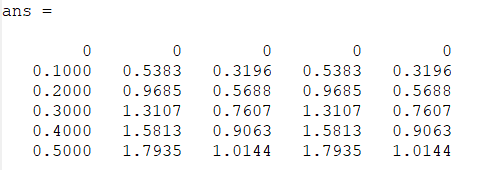

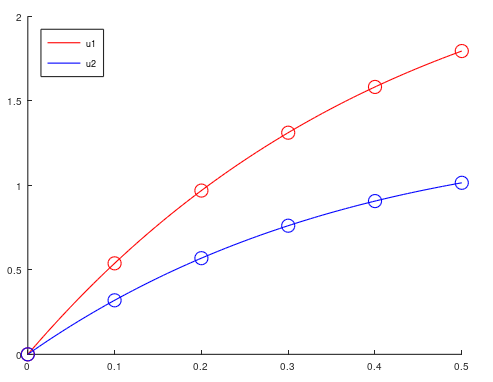

Berikut conoth script file menggunakan kode yang untuk m persamaan.

ans =

        0        0        0        0        0
   0.1000   0.5383   0.3196   0.5383   0.3196
   0.2000   0.9685   0.5688   0.9685   0.5688
   0.3000   1.3107   0.7607   1.3107   0.7607
   0.4000   1.5813   0.9063   1.5813   0.9063
   0.5000   1.7935   1.0144   1.7935   1.0144



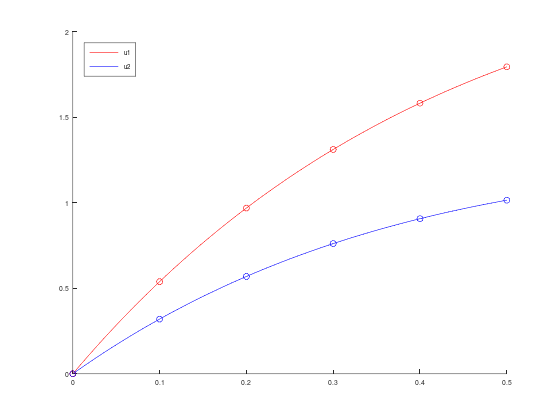

In [5]:
f1 = @(t, y) (-4*y(1) + 3*y(2) + 6);
f2 = @(t, y) (-2.4*y(1) + 1.6*y(2) + 3.6);

a = 0;
b = 0.5;
N = 5;
alpha1 = 0;
alpha2 = 0;

[t, w] = rko4_sysm({f1, f2}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

w1ex = zeros(N+1, 1);
w2ex = zeros(N+1, 1);
for i = 1:length(t)
  w1ex(i) = sln1(t(i));
  w2ex(i) = sln2(t(i));
endfor

[t, w', w1ex, w2ex]

hold on;
fplot(sln1, [0, 0.5], 'r');
fplot(sln2, [0, 0.5], 'b');
scatter(t, w(1, :), 'r');
scatter(t, w(2, :), 'b');
legend('u1', 'u2');
legend('location', 'northwest');

Sebenarnya, kita bisa saja menampilkan dua plot yang terpisah, menggunakan perintah `figure`

ans =

        0        0        0        0        0
   0.1000   0.5383   0.3196   0.5383   0.3196
   0.2000   0.9685   0.5688   0.9685   0.5688
   0.3000   1.3107   0.7607   1.3107   0.7607
   0.4000   1.5813   0.9063   1.5813   0.9063
   0.5000   1.7935   1.0144   1.7935   1.0144



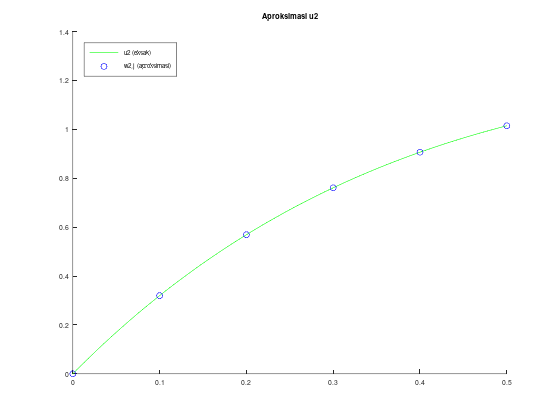

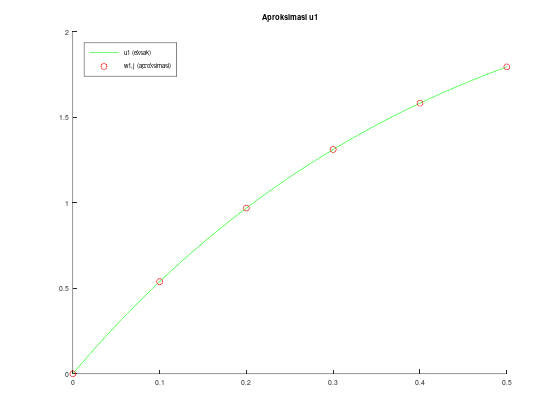

In [8]:
f1 = @(t, y) (-4*y(1) + 3*y(2) + 6);
f2 = @(t, y) (-2.4*y(1) + 1.6*y(2) + 3.6);

a = 0;
b = 0.5;
N = 5;
alpha1 = 0;
alpha2 = 0;

[t, w] = rko4_sysm({f1, f2}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

w1ex = zeros(N+1, 1);
w2ex = zeros(N+1, 1);
for i = 1:length(t)
  w1ex(i) = sln1(t(i));
  w2ex(i) = sln2(t(i));
endfor

[t, w', w1ex, w2ex]

figure;
hold on;
fplot(sln1, [0, 0.5], 'g');
scatter(t, w(1, :), 'r');
title("Aproksimasi u1");
legend("u1 (eksak)", "w1,j (aproksimasi)")
legend('location', 'northwest');

figure;
hold on;
fplot(sln2, [0, 0.5], 'g');
scatter(t, w(2, :), 'b');
title("Aproksimasi u2");
legend("u2 (eksak)", "w2,j (aproksimasi)")
legend('location', 'northwest');

## Linear Shooting Method

### Bentuk Umum
Linear Shooting merupakan metode untuk menyelesaikan masalah PD berbentuk:

$-y'' + p(x)y' + q(x)y + r(x) = 0, \;a\leq x\leq b$

$y(a)=\alpha, \;y(b)=\beta$

### Function File

```octave
function [x_i, w_1i, w_2i] = linshoot(p, q, r, a, b, n, alpha, beta)
  h = (b - a)/n;
  u = [alpha ; 0];
  v = [0 ; 1];
  x_i = w_1i = w_2i = [];
  for i = 1:n
    x = a + (i-1)*h;

    k_11 = h * u(2,i);
    k_12 = h * (p(x)*u(2,i) + q(x)*u(1,i) + r(x));

    k_21 = h * (u(2,i)+(k_12/2));
    k_22 = h * (p(x+(h/2))*(u(2,i)+(k_12/2)) + q(x+(h/2))*(u(1,i)+(k_11/2)) + r(x+(h/2)));

    k_31 = h * (u(2,i)+(k_22/2));
    k_32 = h * (p(x+(h/2))*(u(2,i)+(k_22/2)) + q(x+(h/2))*(u(1,i)+(k_21/2)) + r(x+(h/2)));

    k_41 = h * (u(2,i)+k_32);
    k_42 = h * (p(x+h)*(u(2,i)+k_32) + q(x+h)*(u(1,i)+k_31) + r(x+h));

    u(1,i+1) = u(1,i) + ((k_11 + 2*k_21 + 2*k_31 + k_41)/6);
    u(2,i+1) = u(2,i) + ((k_12 + 2*k_22 + 2*k_32 + k_42)/6);

    kp_11 = h * v(2,i);
    kp_12 = h * (p(x)*v(2,i) + q(x)*v(1,i));

    kp_21 = h * (v(2,i) + (kp_12/2));
    kp_22 = h * (p(x+(h/2))*(v(2,i)+(kp_12/2)) + q(x+(h/2))*(v(1,i)+(kp_11/2)));

    kp_31 = h * (v(2,i)+(kp_22/2));
    kp_32 = h * (p(x+(h/2))*(v(2,i)+(kp_22/2)) + q(x+(h/2))*(v(1,i)+(kp_21/2)));

    kp_41 = h * (v(2,i)+kp_32);
    kp_42 = h * (p(x+h)*(v(2,i)+kp_32) + q(x+h)*(v(1,i)+kp_31));

    v(1,i+1) = v(1,i) + (kp_11 + 2*kp_21 + 2*kp_31 + kp_41)/6;
    v(2,i+1) = v(2,i) + (kp_12 + 2*kp_22 + 2*kp_32 + kp_42)/6;
  endfor

  w = [alpha ; ((beta - u(1,(n+1))) / v(1,(n+1)))];
  x_i(1) = a;
  w_1i(1) = w(1,1);
  w_2i(1) = w(2,1);

  for i = 2:(n+1)
    W1 = u(1,i) + w(2,1)*v(1,i);
    W2 = u(2,i) + w(2,1)*v(2,i);
    x = a + (i-1)*h;
    x_i(i) = x;
    w_1i(i) = W1;
    w_2i(i) = W2;
  endfor
endfunction
```

### Contoh Linear Shooting

$y'' = -\frac{2}{x}y' + \frac{2}{x^2}y + \frac{\sin(\ln(x))}{x^2}, \; 1\leq x\leq 2$

$y(1)=1,\; y(2)=2$

dengan $n=10$

dan solusi eksak:

$y=c_1x+\frac{c_2}{x^2} - \frac{3}{10}\sin(\ln(x))-\frac{1}{10}cos(\ln(x))$

$c_2 = \frac{1}{70}(8-12\sin(\ln(2)) - 4\cos(\ln(2)))$

$c_1 = \frac{11}{10}-c_2$

Berikut code script file untuk permasalahan di atas menggunakan metode linear shooting:

```octave
p = @(x) (-2*(x^(-1)));
q = @(x) (2*(x^(-2)));
r = @(x) (sin(log(x))*(x^(-2)));
a = 1;
b = 2;
alph = 1;
bet = 2;

[xi, w1i, w2i] = linshoot(p, q, r, a, b, 10, alph, bet);

c2 = (8-12*sin(log(2)) - 4*cos(log(2)))/70;
c1 = (11/10) - c2;
sln = @(x) (c1*x + (c2*x^(-2)) - (3/10)*sin(log(x)) - (1/10)*cos(log(x)));
w = [];
for i = 1:length(xi)
  w(i) = sln(xi(i));
endfor

[xi', w1i', w']

hold on;
fplot(sln, [1,2], 'k');
scatter(xi, w1i, '-r');
legend('Eksak', 'Aproksimasi');
legend('location', 'northwest');
```

Jika kita run script file tersebut, maka program akan mengeluarkan dua macam output, yaitu tabel serta plot perbandingan solusi eksak dan aproksimasi seperti di bawah ini:

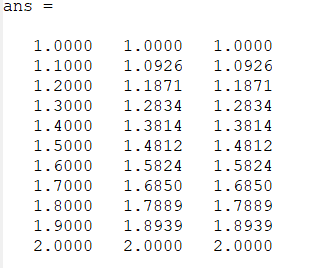

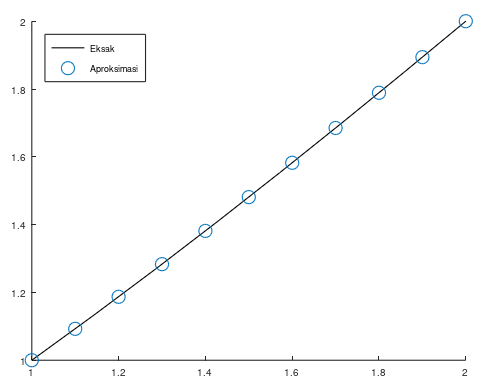

## Nonlinear Shooting Method

### Bentuk umum

Nonlinear Shooting digunakan untuk menyelesaikan masalah PD berbentuk:

$y'' = f(x, y, y'), \; a\leq x \leq b$

$y(a)=\alpha, \; y(b)=\beta$

dimana, $f$ merupakan fungsi nonlinear

### Function file

```octave
function [x_i, w_1i, w_2i] = nonlinshoot(f, fy, fyp, a, b, n, alpha, beta, m, tol)  % m adalah maksimum iterasi
  h = (b - a)/n;
  k = 1;
  tk = (beta - alpha)/(b - a);
  x_i = w_1i = w_2i = [];
  while k <= m
    w = [alpha;tk];
    u = [0,1];
    for i = 1:n
      x = a + (i-1)*h;

      k_11 = h*w(2,i);
      k_12 = h*f(x, w(1,i), w(2,i));

      k_21 = h*(w(2,i)+(k_12/2));
      k_22 = h*f((x+(h/2)), (w(1,i)+(k_11/2)), (w(2,i)+(k_12/2)));

      k_31 = h*(w(2,i)+(k_22/2));
      k_32 = h*f((x+(h/2)), (w(1,i)+(k_21/2)), (w(2,i)+(k_22/2)));

      k_41 = h*(w(2,i)+k_32);
      k_42 = h*f((x+h), (w(1,i)+k_31), (w(2,i)+k_32));

      w(1,i+1) = w(1,i) + ((k_11 + 2*k_21 + 2*k_31 + k_41)/6);
      w(2,i+1) = w(2,i) + ((k_12 + 2*k_22 + 2*k_32 + k_42)/6);

      kp_11 = h*u(2);
      kp_12 = h*(fy(x, w(1,i), w(2,i))*u(1) + fyp(x, w(1,i), w(2,i))*u(2));

      kp_21 = h*(u(2) + (kp_12/2));
      kp_22 = h*(fy((x+(h/2)), w(1,i), w(2,i))*u(1) + fyp((x+(h/2)), w(1,i), w(2,i))*(u(2) + (kp_12/2)));

      kp_31 = h*(u(2)+(kp_22/2));
      kp_32 = h*(fy((x+(h/2)), w(1,i), w(2,i))*(u(1) + (kp_21/2)) + fyp((x+(h/2)), w(1,i), w(2,i))*(u(2) + (kp_22/2)));

      kp_41 = h*(u(2)+kp_32);
      kp_42 = h*(fy((x+h), w(1,i), w(2,i))*(u(1)+kp_31) + fyp((x+h), w(1,i), w(2,i))*(u(2) + kp_32));

      u(1) = u(1) + (kp_11 + 2*kp_21 + 2*kp_31 + kp_41)/6;
      u(2) = u(2) + (kp_12 + 2*kp_22 + 2*kp_32 + kp_42)/6;
    endfor

  if abs(w(1,n+1) - beta) <= tol       % jika sudah mencapai batas toleransi maka program berhenti
    for i = 1:(n+1)
      x = a+(i-1)*h;
      x_i(i) = x;
      w_1i(i) = w(1,i);
      w_2i(i) = w(2,i);
    endfor
    return
  endif
  tk = tk-((w(1,n+1) - beta)/u(1));
  k = k + 1;
  endwhile
  disp('max iteration')
endfunction
```

### Contoh Nonlinear Shooting

$y'' = \frac{1}{8}(32+2x^3-yy'), \; 1\leq x \leq 3$

$y(1) = 17, \; y(3)=43/3$

dengan $n=20$, $m=10$, dan toleransi $=10^{-5}$

dan solusi eksak:

$y(x)=x^2 + \frac{16}{x}$

Berikut code script file untuk permasalahan di atas menggunakan metode linear shooting:

```octave
f = @(x, y, yp) ((1/8)*(32 + 2*x^3 - y*yp));
fy = @(x, y, yp) (-yp/8);
fyp = @(x, y, yp) (-y/8);
a = 1;
b = 3;
n = 20;
alph = 17;
bet = 43/3;
m = 10;
tol = 10^(-5);

[xi, w1i, w2i] = nonlinshoot(f, fy, fyp, a, b, n, alph, bet, m, tol);

sln = @(x) ((x^2) + (16/x));
w = [];
for i = 1:length(xi)
  w(i) = sln(xi(i));
endfor

[xi', w1i', w']

hold on;
fplot(sln, [1,3], 'k');
scatter(xi, w1i, 'r');
legend('Eksak', 'Aproksimasi');
```

Jika kita run script file tersebut, maka program akan mengeluarkan dua macam output, yaitu tabel serta plot perbandingan solusi eksak dan aproksimasi seperti di bawah ini:

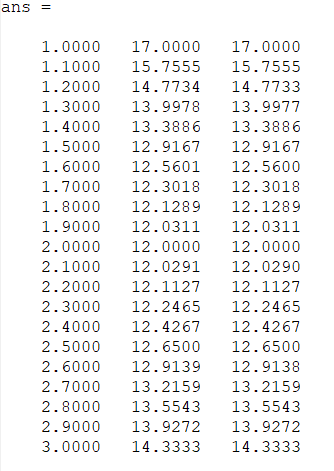

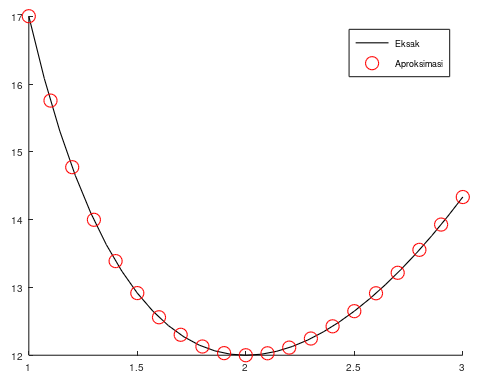